In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [201]:
cpi_df = pd.read_csv('CPIAUCSL.csv')
unrate_df = pd.read_csv('UNRATE.csv')

cpi_df['DATE'] = pd.to_datetime(cpi_df['DATE'])
unrate_df['DATE'] = pd.to_datetime(unrate_df['DATE'])

merged_df = pd.merge(cpi_df, unrate_df, on='DATE', how='inner')

#calculate CPI rate
merged_df['CPI_RATE'] = merged_df['CPIAUCSL'].pct_change() * 100
merged_df = merged_df.dropna()

In [202]:
def identify_outliers_zscore(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    return df[np.abs((df[column] - mean) / std) > threshold].index

#identify outliers in CPI_RATE and UNRATE columns
cpi_outliers = identify_outliers_zscore(merged_df, 'CPI_RATE')
unrate_outliers = identify_outliers_zscore(merged_df, 'UNRATE')

merged_df.loc[cpi_outliers, 'CPI_RATE'] = np.nan
merged_df.loc[unrate_outliers, 'UNRATE'] = np.nan

merged_df['CPI_RATE'] = merged_df['CPI_RATE'].interpolate()
merged_df['UNRATE'] = merged_df['UNRATE'].interpolate()


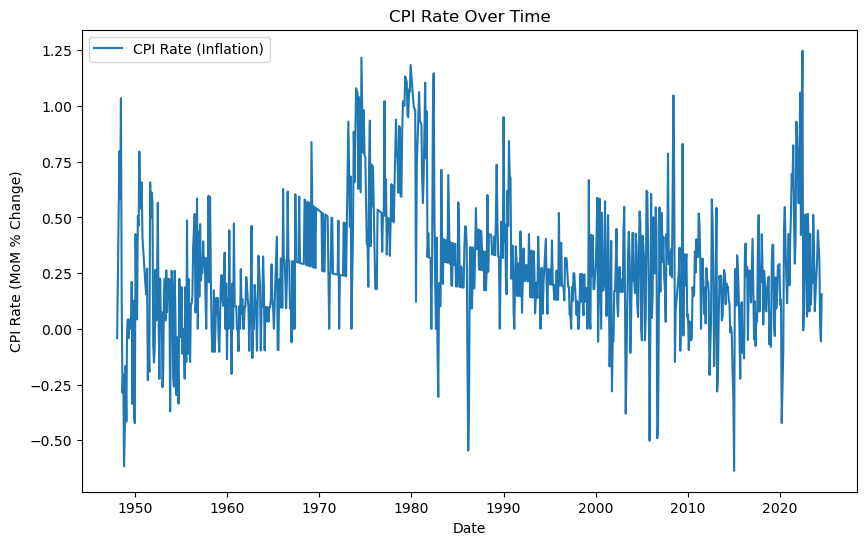

In [203]:
plt.figure(figsize=(10, 6))
plt.plot(merged_df['DATE'], merged_df['CPI_RATE'], label='CPI Rate (Inflation)')
plt.title("CPI Rate Over Time")
plt.xlabel("Date")
plt.ylabel("CPI Rate (MoM % Change)")
plt.legend()
plt.show()

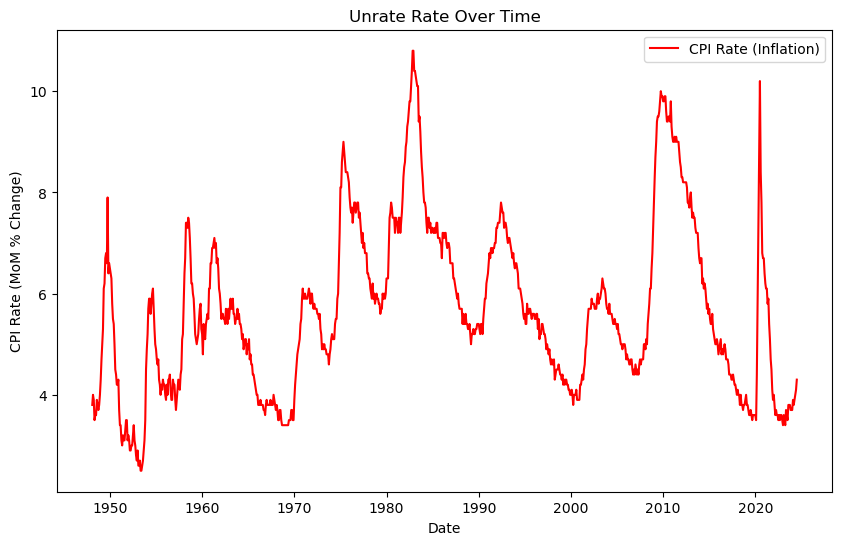

In [204]:
plt.figure(figsize=(10, 6))
plt.plot(merged_df['DATE'], merged_df['UNRATE'], label='CPI Rate (Inflation)', color='r')
plt.title("Unrate Rate Over Time")
plt.xlabel("Date")
plt.ylabel("CPI Rate (MoM % Change)")
plt.legend()
plt.show()